In [14]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal
from sklearn.decomposition import FastICA
from scipy.io import wavfile
#from matplotlib import pyplot as plt

### 1. Try mav sources in sklearn

In [15]:
sampling_rate, mix1 = wavfile.read('mix1.wav')
sampling_rate, mix2 = wavfile.read('mix2.wav')
sampling_rate, source1 = wavfile.read('source1.wav')
sampling_rate, source2 = wavfile.read('source2.wav')

In [16]:
S = c_[source1, source2]
X = c_[mix1, mix2]

In [17]:
ica_mav = FastICA(n_components = 2)
S_pred = ica_mav.fit_transform(X)

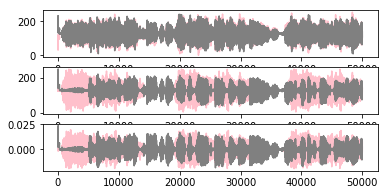

In [19]:
models = [X, S, S_pred]
colors = ['pink', 'grey']
for i, model in enumerate(models):
    plt.subplot(4,1,i+1)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color = color)
        
plt.show()

### 2. generating three new examples 

In [21]:
np.random.seed(50)
t = np.linspace(0, 50, 2000)
s1 = np.cos(3*t)
s2 = signal.sawtooth(5*t)
s3 = np.sin(t)

In [24]:
S = c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)
S /= S.std(axis=0)
A = np.array([[1, 1, 1.5], [0.5, 5, 1.0], [1.5, 1.0, 2.0]])
X = np.dot(S, A.T)


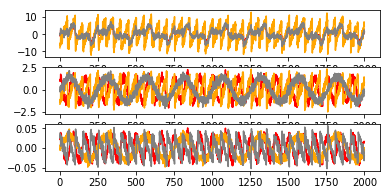

In [25]:
ica = FastICA(n_components = 3)
S_p = ica.fit_transform(X)
colors = ['red', 'orange', 'grey']
models = [X,S,S_p]

for i, model in enumerate(models):
    plt.subplot(4,1,i+1)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color = color)

plt.show()